In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [97]:
#for reproducibility
np.random.seed(42)

In [98]:
X1 = np.random.rand(500)
X2 = np.random.rand(500)
X3 = np.random.rand(500)

noise = np.random.normal(loc=0, scale=5,size=500)
X = np.row_stack([X1,X2,X3])



In [99]:
W_real = np.random.randn(3,1)
b_real = 0 

Y = np.dot(W_real.T, X) + b_real + noise 

In [100]:
print(W_real.shape)
print(X.shape)
print(Y.shape)

(3, 1)
(3, 500)
(1, 500)


In [101]:
def mse(Y,Y_pred) : 
    return (1/len(Y)) * np.sum((Y - Y_pred) ** 2,axis=1)

In [102]:
def init_param(size) : 
    return np.zeros(shape=(size,1)), 0

In [118]:
def gradient_descent(X,y, learning_rate = 0.002, max_iter=100) : 
    
    W, b = init_param(X.shape[0])
    costs = [] 
    
    for epoch in range(1, max_iter+1) : 
        
        y_pred = np.dot(W.T, X) + b 
        
        error = (y_pred - y) 
        
        cost = mse(y,y_pred) 
        costs.append(cost)
        
        if not epoch % 10 : 
            print(f"Epoch {epoch} error {cost[0]} ")
        
        dw = (1 / len(y)) * np.dot(X,error.T)
        db = (1 / len(y)) * np.sum(error)
        
        W -= learning_rate * dw 
        b -= learning_rate * db 
    
    return costs, W,b 
    

In [119]:
costs, W,b = gradient_descent(X,Y)

Epoch 10 error 12873.11432119866 
Epoch 20 error 12797.75796626386 
Epoch 30 error 12782.861446844756 
Epoch 40 error 12779.597622214978 
Epoch 50 error 12778.782546225713 
Epoch 60 error 12778.550137396833 
Epoch 70 error 12778.47654487157 
Epoch 80 error 12778.451612116989 
Epoch 90 error 12778.442838259394 
Epoch 100 error 12778.439689443516 


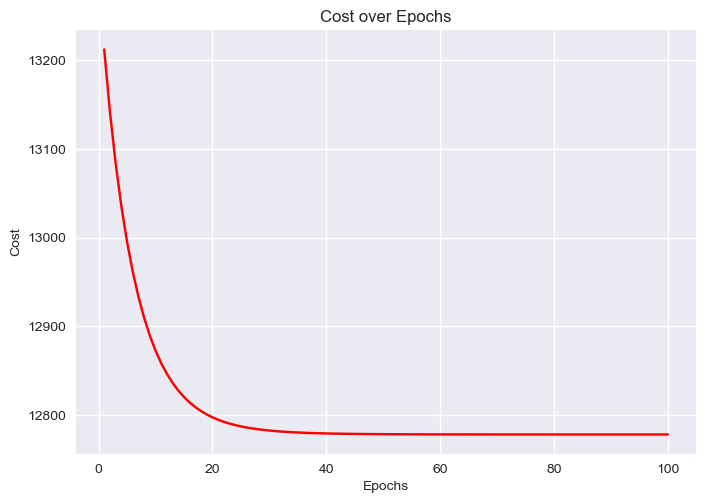

In [120]:
# Plotting the cost over epochs
plt.plot(range(1, len(costs) + 1), costs,color='red')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over Epochs')
plt.grid(True)
plt.show()